<a href="https://colab.research.google.com/github/JimenezHAnaFer/MetodosN/blob/main/Spline_cubico_condicionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Spline cubico condicionado**


In [ ]:
import numpy as np
import sympy as sym

def CubicCon(xi, yi, yprima_x0, yprima_xn):
#Inicializamos las listas en ceros de las cuales iremos agregando las formulas con los valores
  m=xi.size
  n=m-1
  A=np.zeros(m)
  B=np.zeros(n)
  C=np.zeros(m)
  D=np.zeros(n)
  for i in range(m):
    A[i]=yi[i]
    #Buscamos a h
  h=np.zeros(n)
  for i in range(n):
    h[i]=xi[i+1]-xi[i]
  #Comenzamos a reslver el sistema triangular inferior de la matriz
  u=np.zeros(m)
  u[0]=3*(A[1]-A[0])/h[0]-3*yprima_x0
  u[m-1]=3*yprima_xn-3*(A[n-1]-A[m-2])/h[m-2]
  for i in range(1,n):
    u[i]=3*(A[i+1]-A[i])/h[i]-3*(A[i]-A[i-1])/h[i-1]

  s=np.zeros(m)
  z=np.zeros(m)
  t=np.zeros(n)
  s[0]=2*h[0]
  t[0]=0.5
  z[0]=u[0]/s[0]
  for i in range(1,n):
    s[i]=2*(xi[i+1]-xi[i-1])-h[i-1]*t[i-1]
    t[i]=h[i]/s[i]
    z[i]=(u[i]-h[i-1]*z[i-1])/s[i]
  s[m-1]=h[m-2]*(2-t[n-2])
  z[m-1]=(u[n-1]-h[m-2]*z[n-2])/s[n-1]
  C[m-1]=z[m-1]
  #Se termina de calcular el triangulo inferior

  for i in np.flip(np.arange(n)):
    C[i]=z[i]-t[i]*C[i+1]
    B[i]=(A[i+1]-A[i])/h[i]-h[i]*(C[i+1]+2*C[i])/3
    D[i]=(C[i+1]-C[i])/(3*h[i])

  #Empezamos a imprimir y a guardar los polinomios
  x=sym.Symbol('x')
  px_tabla=[] #aqui guardamos los polinomios
  for j in range(0,n,1):
    pxtramo=D[j]*(x-xi[j])**3+C[j]*(x-xi[j])**2
    pxtramo=pxtramo+B[j]*(x-xi[j])+A[j] #los vamos agrupando para que podamos
    #ingresarlas a la lista vacia

    px_tabla.append(pxtramo)
  return A,B,C,D,px_tabla


xi = np.array([0,1,2,3])
fi=np.array([1, 2.718281828459045,7.38905609893065, 20.085536923187668]) #Ingresamos los valores de e, e^2 y e^3
#fi = np.array([1,math.exp, math.exp(2), math.exp(3)])
muestras = 10 # entre cada par de puntos


# Creamos la tabla de polinomios por tramos
n = len(xi)
px_tabla =CubicCon(xi,fi, 1,1)
print("Polinomio por tramos:")
for tramo in range(1,n,1):
  print('x = ['+str[xi(tramo-1)]+','+str(xi[tramo])+'j')
  print(str(px_tabla[tramo-1]))

##Interpolación Spline cúbico

Usar la interpolación de Spline Cúbico en el problema de Runge.

Usemos la función
$$
f(x)=\frac{1}{1+25x^2}
$$

en el intervalo $x\in[-1,1]$

In [6]:
import numpy as np
from scipy import interpolate
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt

In [7]:
x=np.linspace(-1,1,15)
y=1/(1+25*x**2)
lineal=interpolate.interp1d(x,y,kind='linear')
xs=np.linspace(x.min(),x.max())
ys=lineal(xs)

In [8]:
sc=interpolate.interp1d(x,y,kind='cubic')
xs=np.linspace(x.min(),x.max())
yv=sc(xs)

In [9]:
pol=lagrange(x,y)
ypol=pol(xs)

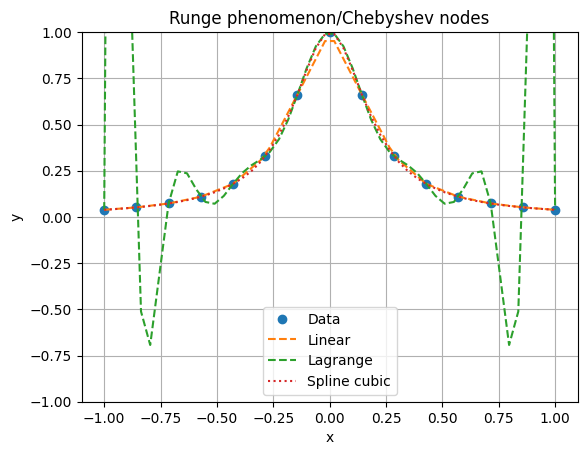

In [10]:
plt.plot(x,y,'o',xs,ys,'--',xs,ypol,'--',xs,yv,':')
plt.grid()
plt.legend(['Data','Linear','Lagrange','Spline cubic'])
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1,1])
plt.title('Runge phenomenon/Chebyshev nodes')
plt.show()